In [75]:
from heapq import merge
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
global numberOfClusters
global showDataBool
global showMatrixBool
arrIndex = []

class Value:
    def __init__(self, value, sum = 0, number = 1):
        self.value = value
        self.sum = value
        self.number = number

    def updateData(self, value, sum, number):
        self.value = value
        self.sum = sum
        self.number = number

def fromInput():
    data = []
    try:
        size = float(input("Size of matrix: "))
        for i in range(size):
            row = list(map(float, input(fr"Row {i}: ").strip().split()))
            numbers = np.array(row)
            if numbers.size != size:
                quit()
            data.append(numbers)
    except:
        print("Error")
        quit()
    return dataToClass(np.array(data))

def fromFile(path):
    try:
        data = []
        dataFile = open(path, "r")
        row = list(map(float, dataFile.readline().strip().split()))
        size = len(row)
        data.append(np.array(row))
        i = 1
        while size > i:
            numbers = np.array(list(map(float, dataFile.readline().strip().split())))
            if numbers.size != size:
                quit()
            data.append(numbers)
            i += 1
        dataFile.close()
    except:
        print("Error")
        quit()
    return dataToClass(np.array(data))

def dataToClass(data):
    dataClass = []
    for i in range(0, len(data)):
        helper = []
        for j in range(0, len(data)):
            helper.append(Value(data[i][j]))
        dataClass.append(helper)
    return dataClass


def get_edge_attributes(G, name):
    edges = G.edges(data=True)
    return dict( (x[:-1], x[-1][name]) for x in edges if name in x[-1] )

def findMinValue(data):
    minValue = 9223372036854775807
    iIndex = 0
    jIndex = 0
    for i in range(0, len(data)):
        for j in range(i + 1, len(data)):
            if minValue > data[i][j].value:
                minValue = data[i][j].value
                iIndex = i
                jIndex = j
    return minValue, iIndex, jIndex

def showMatrix(data):
    if not showMatrixBool:
        return
    for i in range(0, len(data)):
        row = []
        for j in range(0, len(data)):
            row.append(data[i][j].value)
        print(row)
    print()

def updateMatrix(data, mergeIndex1, mergeIndex2, newCluster):
    newIndex = 0
    if mergeIndex1 > mergeIndex2:
        arr = data[:][mergeIndex1]
        arr = np.delete(arr, mergeIndex1)
        data = np.delete(data, mergeIndex1, axis=0)
        data = np.delete(data, mergeIndex1, axis=1)
        newIndex = mergeIndex2
    else:
        arr = data[:][mergeIndex2]
        arr = np.delete(arr, mergeIndex2)
        data = np.delete(data, mergeIndex2, axis=0)
        data = np.delete(data, mergeIndex2, axis=1)
        newIndex = mergeIndex1
    for i in range(len(data[0])):
        data[i, newIndex].updateData(1.0*(arr[i].sum + data[i][newIndex].sum)/(arr[i].number + data[i][newIndex].number), arr[i].sum + data[i][newIndex].sum, arr[i].number + data[i][newIndex].number)
        data[newIndex, i].updateData(data[i][newIndex].value, data[i][newIndex].sum, data[i][newIndex].number)
    data[newIndex, newIndex].updateData(0.0, 0.0, 0)
    showMatrix(data)
    arrIndex.pop(mergeIndex2)
    arrIndex.pop(mergeIndex1)
    arrIndex.insert(newIndex, newCluster)
    return data, newIndex

def algorithm(data):
    showMatrix(data)
    numberOfClusters = 0
    for i in range(len(data[0])):
        newLeaf = "L"+str(i)
        G.add_node(newLeaf)
        arrIndex.append([newLeaf, 0])
    while(len(data[0]) > 1):
        minValue, iIndex, jIndex = findMinValue(data)
        newCluster = ["C"+str(numberOfClusters), minValue/2.0]
        G.add_node(newCluster[0])
        G.add_edge(arrIndex[iIndex][0], newCluster[0], weight=newCluster[1] - arrIndex[iIndex][1])
        G.add_edge(arrIndex[jIndex][0], newCluster[0], weight=newCluster[1] - arrIndex[jIndex][1])
        numberOfClusters+=1
        data, newIndex = updateMatrix(data, iIndex, jIndex, newCluster)
    return data


[0.0, 19.0, 27.0, 8.0, 33.0, 18.0, 13.0]
[19.0, 0.0, 31.0, 18.0, 36.0, 1.0, 13.0]
[27.0, 31.0, 0.0, 26.0, 41.0, 32.0, 29.0]
[8.0, 18.0, 26.0, 0.0, 31.0, 17.0, 14.0]
[33.0, 36.0, 41.0, 31.0, 0.0, 35.0, 28.0]
[18.0, 1.0, 32.0, 17.0, 35.0, 0.0, 12.0]
[13.0, 13.0, 29.0, 14.0, 28.0, 12.0, 0.0]

[0.0, 18.5, 27.0, 8.0, 33.0, 13.0]
[18.5, 0.0, 31.5, 17.5, 35.5, 12.5]
[27.0, 31.5, 0.0, 26.0, 41.0, 29.0]
[8.0, 17.5, 26.0, 0.0, 31.0, 14.0]
[33.0, 35.5, 41.0, 31.0, 0.0, 28.0]
[13.0, 12.5, 29.0, 14.0, 28.0, 0.0]

[0.0, 18.0, 26.5, 32.0, 13.5]
[18.0, 0.0, 31.5, 35.5, 12.5]
[26.5, 31.5, 0.0, 41.0, 29.0]
[32.0, 35.5, 41.0, 0.0, 28.0]
[13.5, 12.5, 29.0, 28.0, 0.0]

[0.0, 16.5, 26.5, 32.0]
[16.5, 0.0, 30.666666666666668, 33.0]
[26.5, 30.666666666666668, 0.0, 41.0]
[32.0, 33.0, 41.0, 0.0]

[0.0, 29.0, 32.6]
[29.0, 0.0, 41.0]
[32.6, 41.0, 0.0]

[0.0, 34.0]
[34.0, 0.0]

[0.0]

Nodes: ['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5']
Edges with weights: {('L0', 'C1'): 4.0, ('L1'

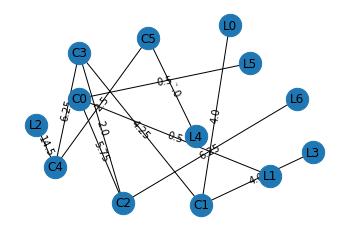

In [76]:
if __name__=='__main__':
    showMatrixBool = True
    showDataBool = True
    #data = fromInput()
    data = fromFile(fr"input\test3.txt")
    algorithm(data)
    pos = nx.spring_layout(G, k=2.15, iterations=20)
    edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if showDataBool:
        print("Nodes:",G.nodes)
        print("Edges with weights:", get_edge_attributes(G, "weight"))
    nx.draw(G, pos, node_size=500,edge_cmap=plt.cm.Reds,with_labels=True)